MODEL VGG16 and RESNET50

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictionsimage
import numpy as np

In [7]:
model=VGG16(weights='imagenet')

553467096/553467096 [==============================] - 7s 0us/step


# finetuning of the pre training model

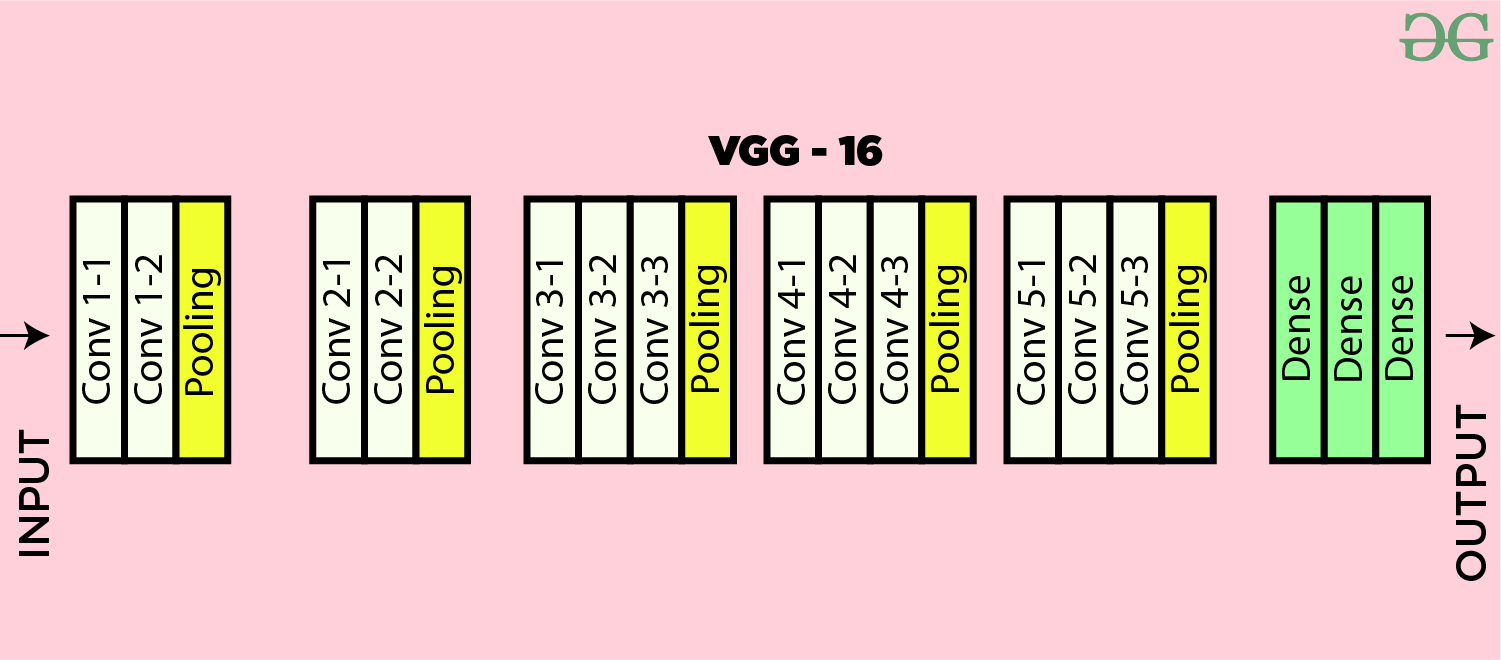

In [39]:
conv_base=VGG16(weights="imagenet",
                include_top=False,
                input_shape=(150,150,3))

In [40]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [41]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [42]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 100)               819300    
                                                                 
 dense_7 (Dense)             (None, 4)                 404       
                                                                 
Total params: 15534392 (59.26 MB)
Trainable params: 15534392 (59.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
train_ds="/content/drive/MyDrive/img_class/train"
#train_ds="/content/drive/MyDrive/dogvscats/train/train"

In [102]:
validation_ds="/content/drive/MyDrive/img_class/test"
#validation_ds="/content/drive/MyDrive/dogvscats/test_data"

In [46]:
conv_base.trainable=False

In [47]:
# internally it is using genrator concept which is there in python

train_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/drive/MyDrive/img_class/train',
    batch_size=32,
    image_size=(150,150),
    labels="inferred",
    label_mode="int"

)

validation_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/drive/MyDrive/img_class/test',
    batch_size=32,
    image_size=(150,150),
    labels="inferred",
    label_mode="int"


)


Found 4020 files belonging to 4 classes.
Found 810 files belonging to 4 classes.


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(train_ds,validation_ds)

In [48]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [49]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [50]:
model.fit(train_ds,epochs=1,validation_data=validation_ds)

126/126 [==============================] - 219s 2s/step - loss: 0.0159 - accuracy: 0.9925 - val_loss: 0.2178 - val_accuracy: 0.9272


In [52]:
import matplotlib.pyplot as plt

In [150]:
#Prediction
dog_img_pred=plt.imread(r"/content/image_322.jpg")

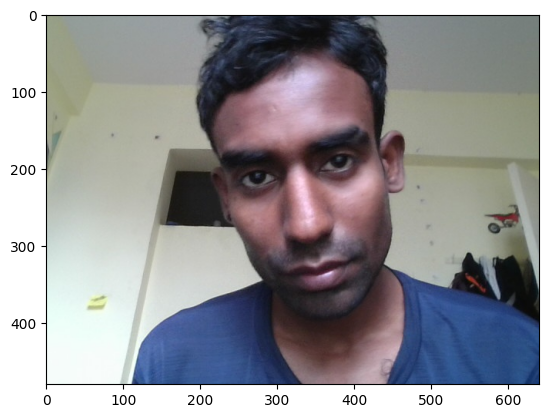

In [151]:
plt.imshow(dog_img_pred)

In [152]:
dog_img_pred.shape

(480, 640, 3)

In [153]:
import cv2
dog_resize=cv2.resize(dog_img_pred,(150,150))


In [154]:
dog_resize.shape

(150, 150, 3)

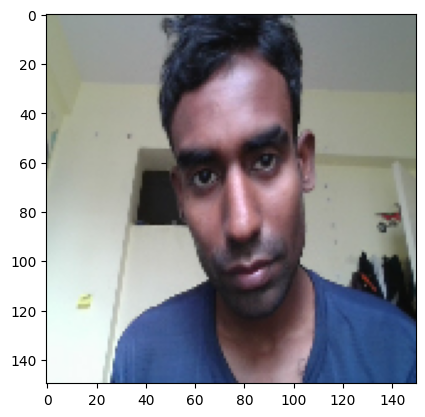

In [155]:
plt.imshow(dog_resize)

In [156]:
dog_resize_pred=dog_resize.reshape((1,150,150,3))

In [157]:
dog_resize_pred.shape

(1, 150, 150, 3)

In [158]:
prediction=model.predict(dog_resize_pred)

1/1 [==============================] - 0s 22ms/step


In [159]:
prediction

array([[1., 0., 0., 0.]], dtype=float32)

In [160]:
from sklearn.metrics import classification_report
predd=np.argmax(prediction,axis=1)
predd

array([0])

In [162]:
#biplab=0,karthik=1,shamnad=2,watch=3
if predd==1:
  print("This is a image of KARTHIK")
elif predd==2:
  print("This is a image of SHAMNAD")
elif predd==0:
  print("This is a image of BIPLAB")
else:
  print("This is a image of WATCH")

This is a image of BIPLAB


FINETUNING IN PRETRAIN MODEL VGG16(CONV_BASE_05)

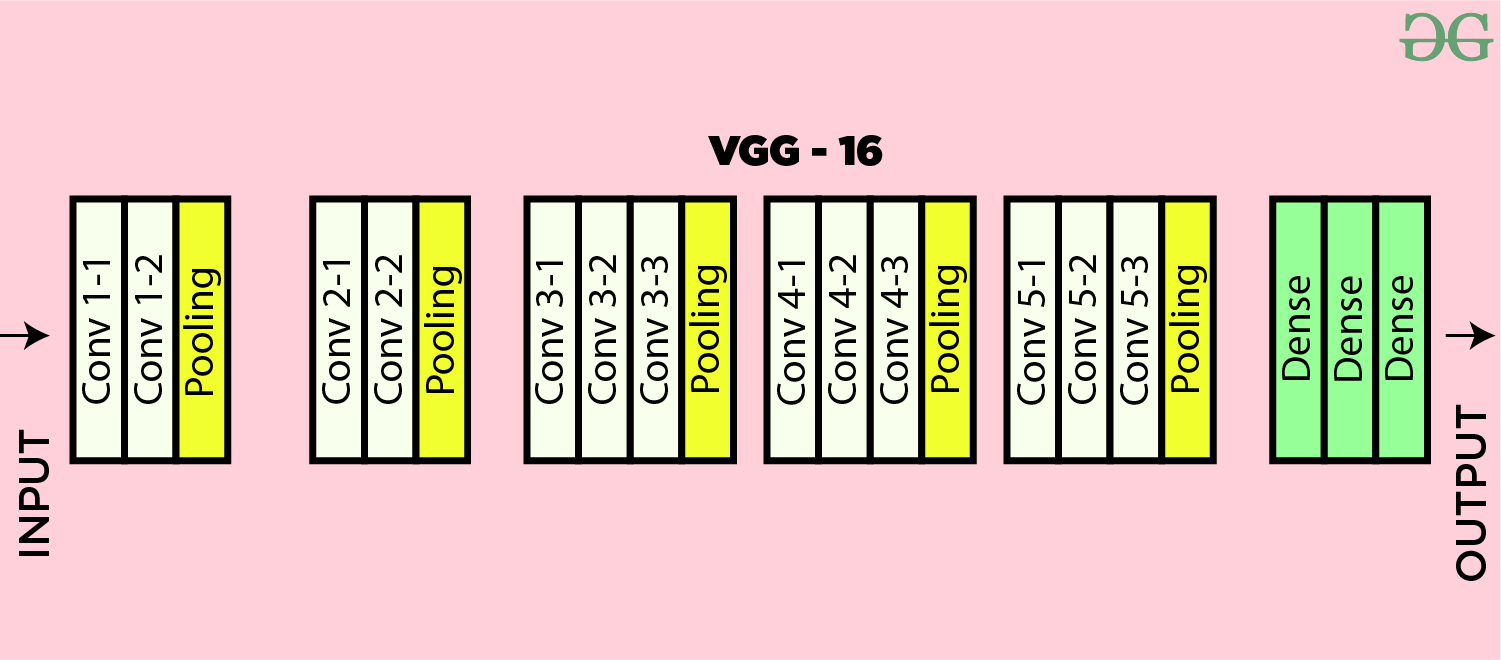

In [127]:
conv_base.layers

In [128]:
len(conv_base.layers)

19

In [129]:
for layer in conv_base.layers:
  print(layer.name)

input_4
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [130]:
conv_base.trainable=True

set_trainable=False

for layer in conv_base.layers:
  if layer.name=="block5_conv1":
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False

In [131]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [132]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [133]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 100)               819300    
                                                                 
 dense_11 (Dense)            (None, 4)                 404       
                                                                 
Total params: 15534392 (59.26 MB)
Trainable params: 7899128 (30.13 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [134]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [135]:
model.fit(train_ds,epochs=1,validation_data=validation_ds)

126/126 [==============================] - 20s 128ms/step - loss: 0.2578 - accuracy: 0.9664 - val_loss: 2.4480 - val_accuracy: 0.8432


MODEL VGG16 and RESNET50

In [ ]:
import numpy as np
import matplotlib.plt as plt
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [ ]:
model_vg=VGG16(weights='imagenet')

In [ ]:
img=image.load_img(img_path,target_size=(224,224))

In [ ]:
img_arr=image.img_to_array(img)

In [ ]:
img_arr.shape

In [ ]:
img=np.expand_dims(img_arr,axis=0)
img.shape
prediction=model.predict(img)
decode_predictions(prediction)

In [ ]:
#resnet
model2=ResNet50(weights='imagenet')
img=preprocess_input(img)
prediction=model2.predict(img)

PRETRAIN_MODELS_CNN

vgg16

vgg19

resnet

inception(google net)

mobile net

nasnet

effient net